<a href="https://colab.research.google.com/github/PEA-IA-DS-Proyecto-1/HomePricePredictorBCN/blob/main/Extracci%C3%B3n_y_preparaci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Uso de SQL y Python:** Extraer los datos de precios de viviendas desde el portal Fotocasa. Se requiere que los datos sean almacenados en una base de datos y manipulados usando SQL para su posterior análisis.

Consideramos que no es necerario realizar ninguna acción en este punto puesto que ya existe el Dataset que ha sido extraido de la web de Fotocasa

### **Formulación del problema de negocio:** El equipo debe definir claramente el problema de predicción, identificando las variables relevantes como la ubicación (código postal o coordenadas), tamaño del inmueble, número de habitaciones, antigüedad, entre otras.

Pensamos que el problema de prediccion viene determinado por el propio proyecto y que no precisa de mayor  precisíon. En cuanto a la identificación de las variables relevantes, consideramos que debido a la poca información que posee cada  registro todas las variables pueden ser de utilidad o bien para el EDA o bien para el modelado predictivo. **(Queda pendiente de valoración al realizar el modelado predictivo no he hecho ningun añalisis para determinar esto**)

### **Preparación del dataset:** A través de Python y SQL, se debe limpiar y transformar el dataset para eliminar inconsistencias, manejar valores nulos y realizar una correcta codificación de las variables categóricas.

Los pasos que vamos a seguir para preparar nuestro Dataset van a ser los siguientes

1. **EDA Básico a origen y Revisar Datos Faltantes**:
   - Identificación campos vacíos o nulos.
   - Decisión de imitar, eliminar o completar esos datos según su importancia.

2. **Verificar Valores Inconsistentes**:
   - Nos aseguraremos de que los rangos de superficie, precio, baños y habitaciones sean razonables.
   - Por ejemplo, que el precio no sea negativo o que la superficie tenga una cifra lógica en relación con la cantidad de habitaciones.

3. **Normalización de Datos**:
   - Unificaremos formatos en caso necesario (por ejemplo, convertir los precios a una sola moneda o utilizar la misma unidad para la superficie).
   - Para las categorías barrio y tipo de propiedad, nos aseguraremos de que no haya variaciones en la escritura (p. ej., "Eixample" contra "eixample").

4. **Eliminación de Duplicados**:
   - Buscaremos entradas duplicadas que puedan distorsionar el análisis.

5. **Manejo de los Outliers**:
   - Identificaremos valores atípicos que podrían ser errores de entrada (por ejemplo, un precio de alquiler extremadamente alto o bajo) y decidiremos si lo mantenemos, lo corregimos o lo eliminamos.

6. **Validación de Categorías Booleanas**:
   - Para el ascensor y la terraza, asegúrarnos de que los valores sean consistentes (por ejemplo, "sí" / "no" o 1/0 o Verdadero/Falso, etc.).

7. **Conversión de Tipos de Datos**:
   - Asegúrarnos de que cada columna tiene el tipo de dato adecuado y en caso contrario convertirlo, como por ejemplo el precio a formato numérico si está en texto.


Otros aspectos que consideraremos antes y despues de la preparación del Dataset son:

**PREVIO A LA PREPARACION**

**Establecimiento de Estructura del DataSet**:
   - Dicha estructura ha quedado definida durante la formulación del problema de negocio que a su vez viene determinada por el propio proyecto, tal como se explica en puntos anteriores.

**POSTERIOR A LA PREPARACION**

**Documentación de Cambios**:
   - Mantendremos un registro de todas las modificaciones realizadas al dataset para conseguir transparencia y facilitar auditorías o revisiones.

**PREVIO Y POSTERIOR A LA PREPARACION**

**Visualización Inicial y Final**:
    - Visualizaremos el dataset antes y después de la limpieza para entender el impacto de los cambios.

1. **EDA Basico a origen y Revisar Datos Faltantes**

        FASE DE EDA BASICA A ORIGEN

In [1]:
#Importar librerias y DataSet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/PEA-IA-DS-Proyecto-1/HomePricePredictorBCN/main/Barcelona_Fotocasa_HousingPrices.csv'
df = pd.read_csv(url)

In [ ]:
#Listar los campos del Dataset
df.columns.tolist()

In [ ]:
#Listar informacion del Dataset
df.info()

In [ ]:
# Descripción estadística básica
print(df.describe())

        FASE DE REVISION DE DATOS FALTANTES

In [ ]:
#Identificación campos vacíos o nulos.

valores_faltantes = df.isnull().sum()

# Porcentaje de valores faltantes
porcentaje_faltantes = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({
    'Valores Faltantes': valores_faltantes,
    'Porcentaje (%)': porcentaje_faltantes.apply(lambda x: "{:.2f}%".format(x))
})
print(missing_info)

Aunque el porcentaje de valores nulos sobre el total es bajo ( menor del 5%), validaremos si esta distribuido de manera  equilibrada entre barrios o si hay barrios en los que afecte mas de un 5% y la afectación se pueda considerar moderada o alta.

In [ ]:
# Codigos para decidir si imitar, eliminar o completar los datos NaN del campo real_state.

# Agrupar por barrio y contar los valores nulos en 'real_state'
null_counts_by_neighborhood = df.groupby('neighborhood')['real_state'].apply(lambda x: x.isnull().sum())

# Calcular el total de unidades por barrio
total_units_by_neighborhood = df['neighborhood'].value_counts()

# Crear un DataFrame con la información del porcentaje
percentage_info = pd.DataFrame({
    'Porcentaje de NaN sobre el total de unidades (%)': (null_counts_by_neighborhood / total_units_by_neighborhood * 100).apply(lambda x: "{:.2f}%".format(x))
}, index=null_counts_by_neighborhood.index)

# Ordenar el DataFrame por el porcentaje
percentage_info = percentage_info.sort_values(by='Porcentaje de NaN sobre el total de unidades (%)', ascending=False)

# Imprimir la información por pantalla
print(percentage_info)


                    Porcentaje de NaN sobre el total de unidades (%)
neighborhood                                                        
Sarria-Sant Gervasi                                            5.44%
Gràcia                                                         4.36%
Sant Martí                                                     4.05%
Ciutat Vella                                                   3.74%
Horta- Guinardo                                                3.17%
Sants-Montjuïc                                                 3.05%
Les Corts                                                      2.29%
Sant Andreu                                                    2.25%
Eixample                                                       1.71%
Nou Barris                                                     0.88%


Los valores  nulos estan repartidos de un modo bastante equilibrado entre barrios y afecta de un modo minimo y similar a todos los barrios, aunque en Sarria-Sant Gervasi afecta sobre el total de manera moderada

CONCLUSION

Dado que el peso que tienen los valores NaN sobre el total del Dataset es bajo y sobre cada barrio tambien podemos considerarlo bajo, optaremos por eliminar los registros aunque a modo de test crearemos un nuevo fichero con los registros eliminados al que le daremos el valor de tipo de vivienda al campo que contiene el NaN de aplicar una mediana de la superficie del tipo de viviendas por cada barrio. De este modo podemos disponer de la totalidad de datos en dos bases de datos por si fuese necesario recurrir a esos datos mas adelante.

In [ ]:
#Implementación de la CONCLUSION

# Cálculo del valor medio de metros cuadrados para cada tipo de vivienda en cada barrio
mean_square_meters = df.groupby(['neighborhood', 'real_state'])['square_meters'].mean().reset_index()

# Renombrar columna para evitar conflictos
mean_square_meters.rename(columns={'square_meters': 'mean_square_meters'}, inplace=True)

# Función para encontrar el tipo de vivienda más cercano basado en el valor medio de metros cuadrados
def find_closest_real_state(row):
    if pd.isna(row['real_state']):
        # Filtrado del DataFrame de medias para obtener el tipo de vivienda con el valor medio más cercano
        neighborhood_data = mean_square_meters[mean_square_meters['neighborhood'] == row['neighborhood']]
        closest_real_state = neighborhood_data.iloc[(neighborhood_data['mean_square_meters'] - row['square_meters']).abs().argsort()[:1]]['real_state'].values[0]
        return closest_real_state
    else:
        return row['real_state']

# Aplicar función y listar los resultados
df['predicted_real_state'] = df.apply(find_closest_real_state, axis=1)

# Filtrar de los registros con NaN en el campo real_state
result = df[pd.isna(df['real_state'])][['neighborhood', 'square_meters', 'predicted_real_state']]

print(result)

# Guardar los datos en un archivo CSV (Donde lo guardamos?????)
# result.to_csv('registros_NaN_real_state.csv', index=False)

# Eliminar las filas con valores NaN en la columna 'real_state'
# df.dropna(subset=['real_state'], inplace=True)

# Guardar los cambios (Guardarlo en GitHub???)
# df.to_csv('Barcelona_Fotocasa_HousingPrices.csv', index=False)

2. **Verificar Valores Inconsistentes**:

In [ ]:
# Verificar valores inconsistentes
def verificar_inconsistencias(df):
    inconsistencias = {}

    # Verificar precios negativos o cero
    inconsistencias['precio_cero_negativo'] = df[df['price'] <= 0]

    # Verificar superficies negativas o cero
    inconsistencias['superficie_cero_negativa'] = df[df['square_meters'] <= 0]

    # Verificar baños negativos o cero
    inconsistencias['baños_cero_negativos'] = df[df['bathroom'] <= 0]

    # Verificar habitaciones negativas o cero
    inconsistencias['habitaciones_cero_negativas'] = df[df['rooms'] <= 0]

    # Verificar relación superficie-habitaciones
    inconsistencias['superficie_habitaciones'] = df[df['square_meters'] / df['rooms'] < 10]

    return inconsistencias

# Llamar a la función y mostrar las inconsistencias
inconsistencias = verificar_inconsistencias(df)
for key, value in inconsistencias.items():
    print(f"{key}:\n{value}\n")

precio_cero_negativo:
Empty DataFrame
Columns: [Unnamed: 0, price, rooms, bathroom, lift, terrace, square_meters, real_state, neighborhood, square_meters_price]
Index: []

superficie_cero_negativa:
Empty DataFrame
Columns: [Unnamed: 0, price, rooms, bathroom, lift, terrace, square_meters, real_state, neighborhood, square_meters_price]
Index: []

baños_cero_negativos:
Empty DataFrame
Columns: [Unnamed: 0, price, rooms, bathroom, lift, terrace, square_meters, real_state, neighborhood, square_meters_price]
Index: []

habitaciones_cero_negativas:
      Unnamed: 0  price  rooms  bathroom   lift  terrace  square_meters  \
83            83    590      0         1  False    False             46   
136          136   1600      0         1   True    False             60   
138          138    650      0         1   True    False             28   
406          406    620      0         1   True    False             29   
472          472   1900      0         3   True     True            145   
.

De la verificación de valores inconsistentes considerando como tal un valor igual o menor a cero y la relación entre habitaciones y superficie, concluimos lo siguiente:



*   No existen valores inconsistentes en ningún registro de la tabla para los campos precio, superficie y nº de baños.
*   Existen 204 registros afectados por insoncistencias para el campo habitaciones donde el valor es cero o inferior. **Hay que explorar con mas profundidad esta anomalia para determinar que hacer con los datos**
*   En la relación entre superficie y habitaciones existen dos registros afectados, donde el numero de habitaciones en relación con la superficie no se corresponde. **Dado que la afectación sobre el total de datos es practicamente nula optaremos por eliminar esos dos registros.**

In [ ]:
# Estudio en profundidad de la inconsistencia de datos localizada para 204 registros de la BBDD
# en relación con el numero de habitaciones

inconsistent_rooms_df = inconsistencias['habitaciones_cero_negativas']

# Estadísticas descriptivas
print("Estadísticas descriptivas:")
print(inconsistent_rooms_df[['rooms', 'square_meters', 'price']].describe())

# Función para agrupar y contar registros inconsistentes
def count_inconsistent_records(df, group_by_column):
    counts = df.groupby(group_by_column)[group_by_column].count()
    info = pd.DataFrame({'Total de registros inconsistentes': counts}, index=counts.index)
    return info.sort_values(by='Total de registros inconsistentes', ascending=True)

# Agrupar por barrio y por tipo de vivienda
inconsistent_info_neighborhood = count_inconsistent_records(inconsistent_rooms_df, 'neighborhood')
inconsistent_info_real_state = count_inconsistent_records(inconsistent_rooms_df, 'real_state')

# Imprimir la información por pantalla
print("\n", inconsistent_info_neighborhood)
print("\n", inconsistent_info_real_state)

# Crear una tabla de contingencia para los registros inconsistentes
inconsistent_matrix = pd.crosstab(inconsistent_rooms_df['neighborhood'], inconsistent_rooms_df['real_state'], margins=True, margins_name="Total")

# Imprimir la matriz por pantalla
print("\n", 'Matriz de  contingencia entre tipo de vivienda y barrio para valores inconsistentes')
print("\n", inconsistent_matrix)


Estadísticas descriptivas:
       rooms  square_meters         price
count  204.0     204.000000    204.000000
mean     0.0      56.009804    956.093137
std      0.0      62.074958    993.654149
min      0.0      15.000000    423.000000
25%      0.0      30.000000    600.000000
50%      0.0      40.000000    722.500000
75%      0.0      58.000000    850.000000
max      0.0     679.000000  10750.000000

                      Total de registros inconsistentes
neighborhood                                          
Sant Andreu                                          3
Nou Barris                                           4
Sant Martí                                           7
Horta- Guinardo                                     11
Les Corts                                           12
Sants-Montjuïc                                      14
Gràcia                                              24
Sarria-Sant Gervasi                                 32
Eixample                                   

Del estudio estadistico, los listados agrupados por tipo de vivienda o por barrio e incluso de la matriz de contingencia aplicadas todas estas soluciones sobre los datos inconsistentes, no se aprecia una clara implicación de estos en futuras acciones que podamos realizar con ellos y por tanto sigue sin ser posible decidir que hacer con estos registros inconsistentes con valor cero o inferior en el campo rooms.

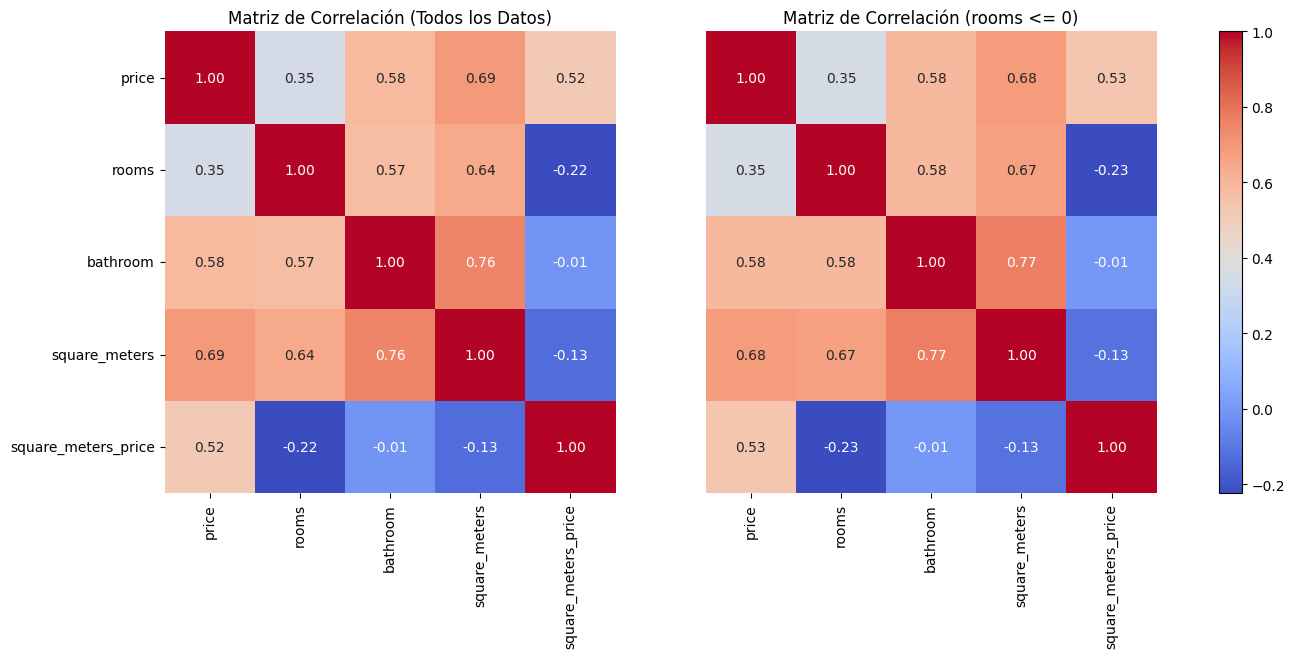

In [ ]:
#Matriz de correlación considerando todos los valores y solo los que tienen mas de cero habitaciones

# Seleccionar solo las columnas numéricas excepto la columna "Unnamed: 0" (esta ultima columna es el key)
numeric_columns = df.select_dtypes(include=['number']).drop(columns=['Unnamed: 0'], errors='ignore').columns

# Calcular la matriz de correlación para todos los datos
correlation_matrix_all = df[numeric_columns].corr()

# Calcular la matriz de correlación para los datos filtrados
filtered_df = df[df['rooms'] > 0]
correlation_matrix_filtered = filtered_df[numeric_columns].corr()

# Crear la figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplots 1 y 2: Matriz de correlación para todos los datos y para los datos filtrados
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0], cbar=False)
axes[0].set_title('Matriz de Correlación (Todos los Datos)')
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1], cbar=False, yticklabels=False)
axes[1].set_title('Matriz de Correlación (rooms <= 0)')

fig.colorbar(axes[0].collections[0], ax=axes, location="right") # Añadir una sola colorbar
plt.show()

Con esta prueba de validación de los datos se observa que la incidendencia en la correlación manteniendo o excluyendo los registros en practicamente nula en muchas de las variables y baja en otras, con lo que podriamos decidir eliminar estos registros inconsistentes. Sin embargo haremos un último trabajo para no desestimar aquellos registros que segun el tipo de propiedad mantengan un equilibrio adecuado con el resto de variables. Vamos a estudiar los tipos de propiedad de estudio y apartamento pues entendemos que son las mas proclives a tener una posible distribución sin habitaciones

In [ ]:
pd.set_option("display.max_rows", None)
filtered_df = df[(df['rooms'] <= 0) & (df['real_state'].isin(['study', 'apartment']))]
# Sort the filtered DataFrame by 'real_state'
sorted_df = filtered_df.sort_values(by=['real_state'])
# Select only the desired columns and print the results
result_df = sorted_df[['neighborhood', 'real_state', 'price', 'square_meters', 'rooms', 'bathroom']]
display(result_df)
pd.reset_option("display.max_rows")

Tras la elaboración de este listado filtrado por tipo de propiedad y centrados en las dos tipologias antes mencionadas, se observan una serie de outliers que consideramos que podrian ser eliminados para evitar dentro de esos grupos distorsiones. Concretamente son aquellos registros que poseen una superficie claramente por encima de la media y en total ascienden a 4 registros.

CONCLUSION

Tras todas la pruebas realizadas decidimos eliminar todos los registros que siendo estudios o apartamentos y teniendo cero o menos dormitorios, poseen una superficie claramente por encima del resto. Tambien decidimos eliminar todos el resto de registros que no tienen dormitorios y que no son ni estudios ni apartamentos

In [ ]:
#Implementación de la CONCLUSION


3. **Normalización de datos**

    No hay que unificar formatos de moneda o superficie porque todos los registros entendemos que estan expresados en euros y metros cuadrados respectivamente. Tampoco tenemos opción de saberlo porque no poseemos la fuente primaria de los datos.(El acceso a la web sobre la que hicieron el scrapping). En cualquier caso damos por validos el formato porque en esa web lo común y tradicional es usar esos formatos para los datos.
    
    Para las categorías barrio y tipo de propiedad, nos aseguraremos de que no haya variaciones en la escritura (p. ej., "Eixample" contra "eixample").

In [ ]:
# Verificar barrios únicos
unique_neighborhoods = df['neighborhood'].str.lower().str.strip().unique()
print("Barrios únicos:", unique_neighborhoods)

# Verificar tipos de propiedad únicos
unique_real_states = df['real_state'].str.lower().str.strip().unique()
print("Tipos de propiedad únicos:", unique_real_states)

Barrios únicos: ['horta- guinardo' 'sant andreu' 'gràcia' 'ciutat vella'
 'sarria-sant gervasi' 'les corts' 'sant martí' 'eixample'
 'sants-montjuïc' 'nou barris']
Tipos de propiedad únicos: ['flat' 'attic' nan 'apartment' 'study']


CONCLUSION

Del estudio realizado se desprende que no es necesaria ningun tipo de actuación para la normalización de datos en este Dataframe

4. **Eliminación de Duplicados**

    Busqueda de registros duplicados que puedan distorsionar el análisis
    

In [ ]:
def find_exact_duplicates(df):
    # Crear una columna temporal que combine los valores de las columnas especificadas
    df['combined'] = df.apply(lambda row: '_'.join(row.astype(str)), axis=1)

    # Identificar registros duplicados basados en la columna combinada
    duplicate_mask = df.duplicated(subset=['combined'], keep=False)

    # Filtrar el DataFrame para mostrar solo los registros duplicados
    duplicates = df[duplicate_mask]

    # Eliminar la columna temporal
    df.drop(columns=['combined'], inplace=True)

    return duplicates

# Encontrar duplicados exactos
exact_duplicates = find_exact_duplicates(df)
print(exact_duplicates)

# Este código hace lo siguiente: (Elaborado con COPILOT)
#Crea una columna temporal combined que combina los valores de las columnas especificadas en una sola cadena.
#Usa el método duplicated para identificar registros duplicados basados en la columna combinada.
#Filtra el DataFrame original df usando la máscara duplicate_mask para obtener solo los registros duplicados.
#Elimina la columna temporal combined del DataFrame original.
#Devuelve un DataFrame que contiene solo los registros duplicados.

Empty DataFrame
Columns: [Unnamed: 0, price, rooms, bathroom, lift, terrace, square_meters, real_state, neighborhood, square_meters_price, combined]
Index: []


CONCLUSION

Del estudio realizado se desprende que no es necesaria ningun tipo de actuación para la eliminación de  duplicados en este Dataframe

5. **Manejo de los Outliers**:

    Identificación valores atípicos que podrían ser errores de entrada (por ejemplo, un precio de alquiler extremadamente alto o bajo) y decidiremos si lo mantenemos, lo corregimos o lo eliminamos 5% de outliers por arriba y por abajo

In [ ]:
def find_outliers(df, column):
    # Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
    Q1 = df[column].quantile(0.05)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1

    # Definir los límites inferior y superior para los outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar los outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers

# Encontrar outliers para cada columna
outliers_square_meters = find_outliers(df, 'square_meters')[['Unnamed: 0', 'price', 'rooms', 'square_meters', 'bathroom', 'neighborhood', 'real_state']]
outliers_price = find_outliers(df, 'price')[['Unnamed: 0', 'price', 'rooms', 'square_meters', 'bathroom', 'neighborhood', 'real_state']]
outliers_rooms = find_outliers(df, 'rooms')[['Unnamed: 0', 'price', 'rooms', 'square_meters', 'bathroom', 'neighborhood', 'real_state']]
outliers_bathroom = find_outliers(df, 'bathroom')[['Unnamed: 0', 'price', 'rooms', 'square_meters', 'bathroom', 'neighborhood', 'real_state']]

# Imprimir resultados sin la columna 'Unnamed: 0' y contar los outliers
def print_and_count_outliers(outliers, column_name):
    print(f"Outliers en {column_name}:")
    print(outliers.loc[:, outliers.columns != 'Unnamed: 0'])
    print(f"Total de outliers en {column_name}: {len(outliers)}\n")

print_and_count_outliers(outliers_square_meters, 'square_meters')
print_and_count_outliers(outliers_price, 'price')
print_and_count_outliers(outliers_rooms, 'rooms')
print_and_count_outliers(outliers_bathroom, 'bathroom')

Outliers en square_meters:
      price  rooms  square_meters  bathroom         neighborhood real_state
170    5250      5            395         3         Ciutat Vella      attic
400    7000      5            400         5  Sarria-Sant Gervasi       flat
536    8500      5            480         5  Sarria-Sant Gervasi       flat
1772  15000      4            450         1  Sarria-Sant Gervasi       flat
2427  15000      4            450         3  Sarria-Sant Gervasi  apartment
2703   5200      4            398         4  Sarria-Sant Gervasi      attic
2754  15000      4            450         5  Sarria-Sant Gervasi       flat
2867   7000      6            405         6  Sarria-Sant Gervasi       flat
3772   5500      5            429         4            Les Corts      attic
4220  15000      4            450         3  Sarria-Sant Gervasi       flat
4579   5200      5            398         4  Sarria-Sant Gervasi      attic
4725  15000      4            475         4  Sarria-Sant Gerv

Hemos aislado 62 outliers que quedan fuera de las franjas del 5% fijadas y consideramos realizar una matriz de correlación para determinar como afecta a las variables su posible futura eliminación.

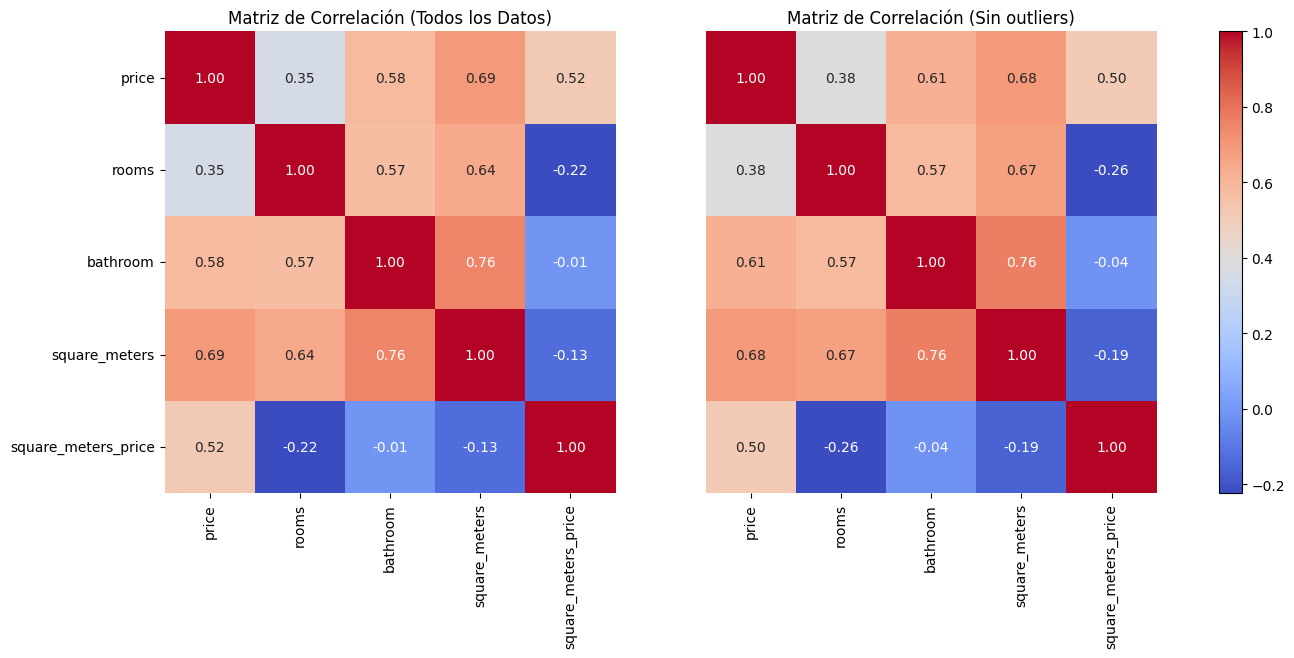

In [ ]:
#Matriz de correlación considerando todos los valores y los todos los valores excepto los outliers

# Seleccionar solo las columnas numéricas excepto la columna "Unnamed: 0" (esta ultima columna es el key)
numeric_columns = df.select_dtypes(include=['number']).drop(columns=['Unnamed: 0'], errors='ignore').columns

# Calcular la matriz de correlación para todos los datos
correlation_matrix_all = df[numeric_columns].corr()

# Calcular la matriz de correlación para los datos filtrados
outliers_combined = pd.concat([outliers_square_meters, outliers_price, outliers_rooms, outliers_bathroom]).drop_duplicates() # Combinar todos los outliers en un solo DataFrame y eliminar  duplicados
df_clean = df[~df['Unnamed: 0'].isin(outliers_combined['Unnamed: 0'])] # Eliminar los outliers del segundo dataset basándonos en la columna 'Unnamed: 0'
correlation_matrix_filtered = df_clean[numeric_columns].corr()

# Crear la figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplots 1 y 2: Matriz de correlación para todos los datos y para los datos filtrados
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0], cbar=False)
axes[0].set_title('Matriz de Correlación (Todos los Datos)')
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1], cbar=False, yticklabels=False)
axes[1].set_title('Matriz de Correlación (Sin outliers)')

fig.colorbar(axes[0].collections[0], ax=axes, location="right") # Añadir una sola colorbar
plt.show()

Visto el resultado de la matriz en el que se observa que no se produce una grave desvirtualización de las relaciones y teniendo en cuenta que previamente habiamos desestimado los registros con numero de habitaciones menor a 1, vamos a testear los resultados de eliminar los registros de outliers al dataframe que contiene los valores con el numero de habitaciones menores a 1 eliminados para tomar la decision final de si eliminamos o no los outliers.

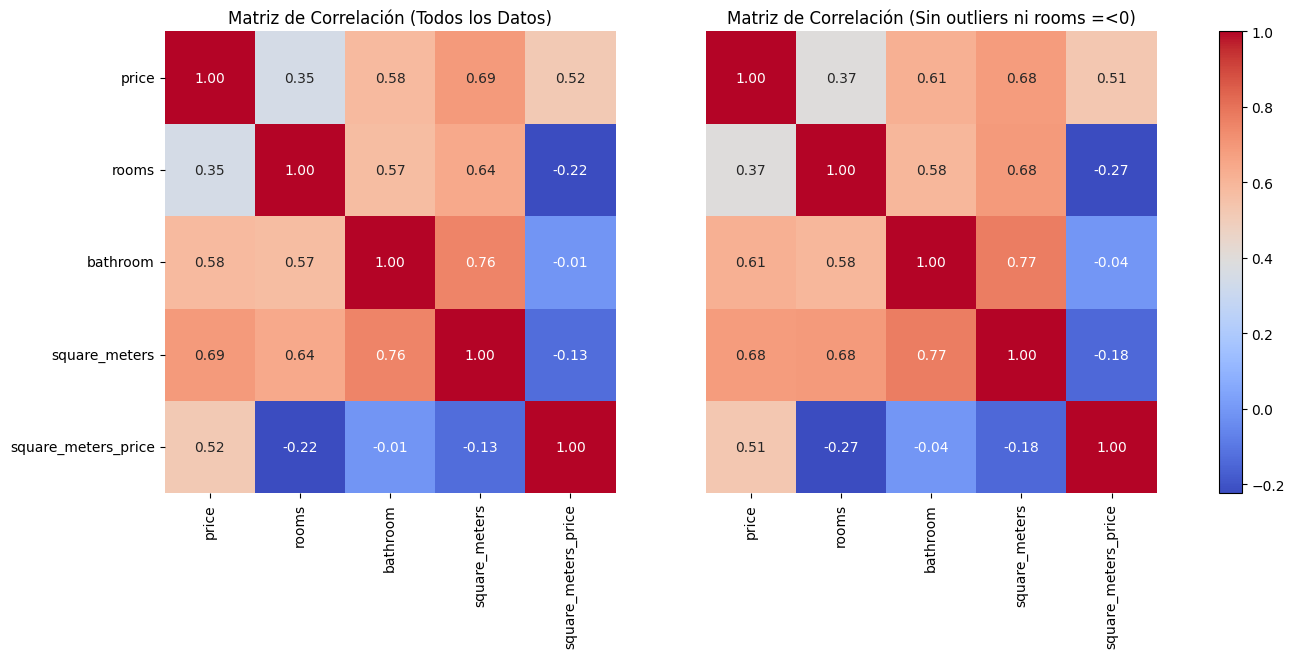

In [ ]:
#Matriz de correlación considerando todos los valores y otra con los todos los valores excepto los outliers y los de habitaciones menor de 1

# Seleccionar solo las columnas numéricas excepto la columna "Unnamed: 0" (esta ultima columna es el key)
numeric_columns = df.select_dtypes(include=['number']).drop(columns=['Unnamed: 0'], errors='ignore').columns

# Calcular la matriz de correlación para todos los datos
correlation_matrix_all = df[numeric_columns].corr()

# Calcular la matriz de correlación para los datos filtrados
filtered_df = df[df['rooms'] > 0]
outliers_combined = pd.concat([outliers_square_meters, outliers_price, outliers_rooms, outliers_bathroom]).drop_duplicates() # Combinar todos los outliers en un solo DataFrame y eliminar  duplicados
filtered_df = df[df['rooms'] > 0]
df_clean = filtered_df[~filtered_df['Unnamed: 0'].isin(outliers_combined['Unnamed: 0'])] # Eliminar los outliers del segundo dataset basándonos en la columna 'Unnamed: 0'
correlation_matrix_filtered = df_clean[numeric_columns].corr()

# Crear la figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplots 1 y 2: Matriz de correlación para todos los datos y para los datos filtrados
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0], cbar=False)
axes[0].set_title('Matriz de Correlación (Todos los Datos)')
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1], cbar=False, yticklabels=False)
axes[1].set_title('Matriz de Correlación (Sin outliers ni rooms =<0)')

fig.colorbar(axes[0].collections[0], ax=axes, location="right") # Añadir una sola colorbar
plt.show()

CONCLUSION

Tras todas la pruebas realizadas decidimos eliminar todos los registros que se han generado tras nuestro testeo de outlaiers puesto que no afectan en gran media a los datos y su interrelación.

6. **Validación de Categorías Booleanas**:
    
    Para el ascensor y la terraza, asegúrarnos de que los valores sean consistentes (por ejemplo, "sí" / "no" o 1/0 o Verdadero/Falso, etc.).


In [ ]:
# Verificar valores únicos en las columnas 'lift' y 'terrace'
print("Valores únicos en 'lift':", df['lift'].unique())
print("Valores únicos en 'terrace':", df['terrace'].unique())

Valores únicos en 'lift': [ True False]
Valores únicos en 'terrace': [False  True]


CONCLUSION

Del estudio realizado se desprende que no es necesaria ningun tipo de actuación en relación a la consistencia de los datos en los campos booleanos en este Dataframe

7. **Conversión de Tipos de Datos**:
    Asegurar que cada columna tiene el tipo de dato adecuado y en caso contrario convertirlo, como por ejemplo el precio a formato numérico si está en texto, un booleano que sea así, etcétera.

In [ ]:
# Imprimir el tipo de cada variable
print(df.dtypes)

Unnamed: 0               int64
price                    int64
rooms                    int64
bathroom                 int64
lift                      bool
terrace                   bool
square_meters            int64
real_state              object
neighborhood            object
square_meters_price    float64
dtype: object


CONCLUSION

Del estudio realizado se desprende que no es necesaria ningun tipo de actuación en relación a la conversión de tipo de dato de los campos en este Dataframe